# IBM6: Data Analysis 4: Model Evaluation

<h1>Table of Contents</h1>
<ul>
    <li><a href="#Part-1:-Training-and-Testing">Model Evaluation: Training and Testing</a></li>
    <li><a href="#Part-2:-Overfitting,-Underfitting-and-Model-Selection">Over-fitting, Under-fitting and Model Selection </a></li>
    <li><a href="#Part-3:-Ridge-regression">Ridge Regression </a></li>
    <li><a href="#Part-4:-Grid-Search">Grid Search</a></li>
</ul>

In [1]:
import pandas as pd
import numpy as np

#### <em>LaTex</em> for mathematical notation

In [30]:
from IPython.display import Latex

#### Load CSV from an online source

In [2]:
path = 'https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-DA0101EN-SkillsNetwork/labs/Data%20files/module_5_auto.csv'

In [3]:
df = pd.read_csv(path)
df.head()

,Unnamed: 0,Unnamed: 0.1,symboling,normalized-losses,make,aspiration,num-of-doors,body-style,drive-wheels,engine-location,...,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price,city-L/100km,horsepower-binned,diesel,gas
0,0,0,3,122,alfa-romero,std,two,convertible,rwd,front,...,9.0,111.0,5000.0,21,27,13495.0,11.190476,Medium,0,1
1,1,1,3,122,alfa-romero,std,two,convertible,rwd,front,...,9.0,111.0,5000.0,21,27,16500.0,11.190476,Medium,0,1
2,2,2,1,122,alfa-romero,std,two,hatchback,rwd,front,...,9.0,154.0,5000.0,19,26,16500.0,12.368421,Medium,0,1
3,3,3,2,164,audi,std,four,sedan,fwd,front,...,10.0,102.0,5500.0,24,30,13950.0,9.791667,Medium,0,1
4,4,4,2,164,audi,std,four,sedan,4wd,front,...,8.0,115.0,5500.0,18,22,17450.0,13.055556,Medium,0,1


#### Only use numeric data

In [4]:
df = df._get_numeric_data()
df.head()

,Unnamed: 0,Unnamed: 0.1,symboling,normalized-losses,wheel-base,length,width,height,curb-weight,engine-size,...,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price,city-L/100km,diesel,gas
0,0,0,3,122,88.6,0.811148,0.890278,48.8,2548,130,...,2.68,9.0,111.0,5000.0,21,27,13495.0,11.190476,0,1
1,1,1,3,122,88.6,0.811148,0.890278,48.8,2548,130,...,2.68,9.0,111.0,5000.0,21,27,16500.0,11.190476,0,1
2,2,2,1,122,94.5,0.822681,0.909722,52.4,2823,152,...,3.47,9.0,154.0,5000.0,19,26,16500.0,12.368421,0,1
3,3,3,2,164,99.8,0.848630,0.919444,54.3,2337,109,...,3.40,10.0,102.0,5500.0,24,30,13950.0,9.791667,0,1
4,4,4,2,164,99.4,0.848630,0.922222,54.3,2824,136,...,3.40,8.0,115.0,5500.0,18,22,17450.0,13.055556,0,1


#### Libraries for plotting

In [5]:
# %%capture
#! pip install ipywidgets

In [6]:
from IPython.display import display
from ipywidgets import interact, interactive, fixed, interact_manual, widgets

#### Functions for plotting

In [7]:
import matplotlib.pyplot as plt
import seaborn as sns

def PriceDistributionPlot(RedFunction, BlueFunction, RedName, BlueName, Title):
    width = 12
    height = 10
    plt.figure(figsize=(width, height))
    
    ax1 = sns.distplot(RedFunction, hist=False, color='r', label=RedName)
    ax2 = sns.distplot(BlueFunction, hist=False, color='b', label=BlueName)
    
    plt.title(Title, fontsize=20)
    plt.xlabel('Price (in USD)', fontsize=18)
    plt.ylabel('Proportion of Cars', fontsize=18)
    
    plt.show()
    plt.close()

In [8]:
import matplotlib.pyplot as plt
import seaborn as sns

def PollyPlot(x_train, x_test, y_train, y_test, lr, poly_transform):
    """
    training data 
    testing data 
    lr:  linear regression object 
    poly_transform:  polynomial transformation object 
    """
    
    width = 12
    height = 10
    plt.figure(figsize = (width, height))
    
    x_max = max([x_train.values.max(), x_test.values.max()])
    x_min = min([x_train.values.min(), x_test.values.min()])
    x = np.arange(x_min, x_max, 0.1)
    
    plt.plot(x_train, y_train, 'ro', label='Training Data')
    plt.plot(x_test, y_test, 'go', label="Testing Data")
    
    plt.plot(
        x, 
        lr.predict(poly_transform.fit_transform(x.reshape(-1, 1))),
        label='Predicted Function'
    )
    plt.ylim([-10000, 60000])
    
    plt.ylabel('Price', fontsize=20)
    plt.legend()

<h1 id="1">Part 1: Model Evaluation: Training and Testing</h1>

#### Target

In [9]:
y_data = df['price']

#### Features only, drop target

In [10]:
x_data = df.drop('price', axis=1)

#### Randomly split data

In [11]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(
    x_data, 
    y_data, 
    test_size=0.15, 
    random_state=1
)

In [12]:
print("number of test samples :", x_test.shape[0])
print("number of training samples:",x_train.shape[0])

number of test samples : 31
number of training samples: 170


#### Linear Regression

In [13]:
from sklearn.linear_model import LinearRegression

lre = LinearRegression()

#### Fit LRE using the horsepower feature

In [14]:
lre.fit(x_train[['horsepower']], y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

#### Score using R^2
#### Pearson's r is usually used to express the correlation between two quantities. R^2 is usually used to evaluate the quality of fit of a model on data.

In [15]:
lre.score(x_test[['horsepower']], y_test)

0.707688374146705

In [16]:
lre.score(x_train[['horsepower']], y_train)

0.6449517437659684

## Cross-Validation Score

In [17]:
from sklearn.model_selection import cross_val_score

Rcross = cross_val_score(lre, x_data[['horsepower']], y_data, cv=4)

print("Rcross = ", Rcross)
print("Rcross' mean = ", Rcross.mean())
print("Rcross' standard deviation = " , Rcross.std())

Rcross =  [0.7746232  0.51716687 0.74785353 0.04839605]
Rcross' mean =  0.522009915042119
Rcross' standard deviation =  0.2911839444756029


We can use negative squared error as a score by setting the parameter **scoring** metric to **neg_mean_squared_error**. 

In [18]:
-1 * cross_val_score(lre,x_data[['horsepower']], y_data,cv=4,scoring='neg_mean_squared_error')

array([20254142.84026704, 43745493.2650517 , 12539630.34014931,
       17561927.72247591])

#### The function <code>cross_val_predict</code> can be used to predict the output. It splits up the data into the specified number of folds, using one fold to get a prediction while the rest of the folds are used as training data.

In [19]:
from sklearn.model_selection import cross_val_predict

yhat = cross_val_predict(
    lre,
    x_data[['horsepower']], 
    y_data,
    cv=4
)

yhat[0:5]

array([14141.63807508, 14141.63807508, 20814.29423473, 12745.03562306,
       14762.35027598])

<h1 id="ref2">Part 2: Overfitting, Underfitting and Model Selection</h1>

#### Fit

In [20]:
lr = LinearRegression()
lr.fit(x_train[['horsepower', 'curb-weight', 'engine-size', 'highway-mpg']], y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

#### Predict using training data

In [21]:
yhat_train = lr.predict(x_train[['horsepower', 'curb-weight', 'engine-size', 'highway-mpg']])
yhat_train[0:5]

array([11927.70699817, 11236.71672034,  6436.91775515, 21890.22064982,
       16667.18254832])

#### Predict using testing data

In [22]:
yhat_test = lr.predict(x_test[['horsepower', 'curb-weight', 'engine-size', 'highway-mpg']])
yhat_test[0:5]

array([11349.16502418,  5914.48335385, 11243.76325987,  6662.03197043,
       15555.76936275])

#### Model evaluation by visualizing with matplotlib and seaborn

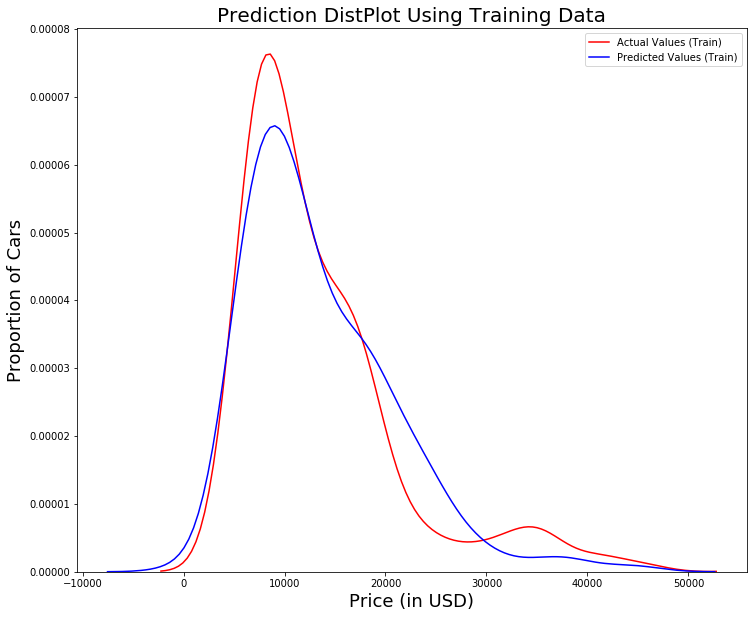

In [23]:
Title = 'Prediction DistPlot Using Training Data'

PriceDistributionPlot(
    y_train, 
    yhat_train, 
    "Actual Values (Train)", 
    "Predicted Values (Train)", 
    Title
)

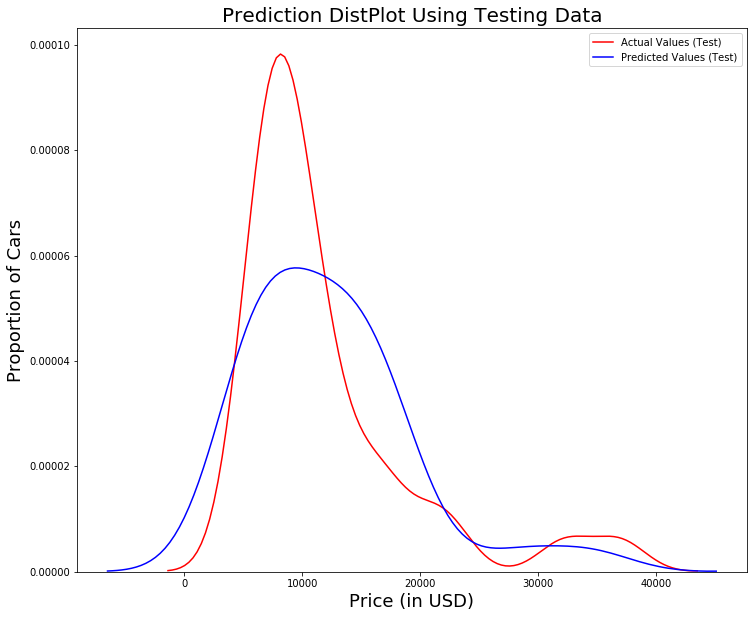

In [24]:
Title='Prediction DistPlot Using Testing Data'
PriceDistributionPlot(y_test,yhat_test,"Actual Values (Test)","Predicted Values (Test)",Title)

#### Degree 5 Polynomial Model

In [25]:
from sklearn.preprocessing import PolynomialFeatures

x_train, x_test, y_train, y_test = train_test_split(
    x_data, 
    y_data, 
    test_size=0.45, # NOTE THE INCREASE
    random_state=0
)

pr = PolynomialFeatures(degree=5)

x_train_pr = pr.fit_transform(x_train[['horsepower']])
x_test_pr = pr.fit_transform(x_test[['horsepower']])

poly = LinearRegression()
poly.fit(x_train_pr, y_train)

yhat = poly.predict(x_test_pr)

In [26]:
print("Predicted values:", yhat[0:4])
print("True values:", y_test[0:4].values)

Predicted values: [ 6728.70501896  7308.02845162 12213.7843307  18893.19108677]
True values: [ 6295. 10698. 13860. 13499.]


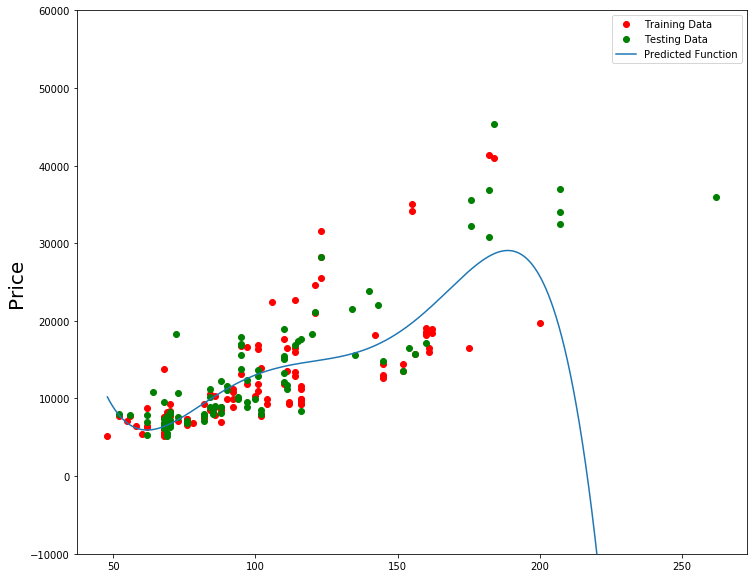

In [27]:
PollyPlot(
    x_train[['horsepower']], 
    x_test[['horsepower']], 
    y_train, 
    y_test, 
    poly,
    pr
)

<strong>We see that the estimated function appears to track the data but around 200 horsepower, the function begins to diverge from the data points.</strong>

#### $R^{2}$ of the training data

In [31]:
poly.score(x_train_pr, y_train)

0.5567716902635091

#### $R^{2}$ of the testing data

In [32]:
poly.score(x_test_pr, y_test)

-29.87141885918752

### Reminder: The lower the $R^2$ score, the worse the model. Furthermore, a negative $R^2$ is a sign of overfitting.

#### Let's try different order polynomials and plot the results

Text(3, 0.75, 'Maximum R^2 ')

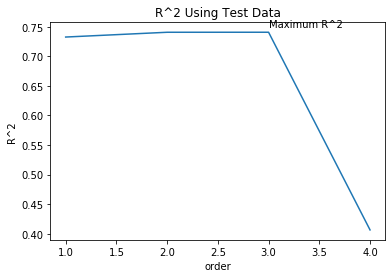

In [33]:
Rsqu_test = []

order = [1, 2, 3, 4]

for n in order:
    pr = PolynomialFeatures(degree=n)
    
    x_train_pr = pr.fit_transform(x_train[['horsepower']])
    
    x_test_pr = pr.fit_transform(x_test[['horsepower']])    
    
    lr.fit(x_train_pr, y_train)
    
    Rsqu_test.append(lr.score(x_test_pr, y_test))

plt.plot(order, Rsqu_test)
plt.xlabel('order')
plt.ylabel('R^2')
plt.title('R^2 Using Test Data')
plt.text(3, 0.75, 'Maximum R^2 ')

#### We see above that the $R^2$ gradually increases until an order three polynomial is used. Then the  $R^2$ dramatically decreases at four.

#### Visualize interactively

In [34]:
def f(order, test_data):
    x_train, x_test, y_train, y_test = train_test_split(
        x_data, 
        y_data, 
        test_size=test_data, 
        random_state=0
    )
    
    pr = PolynomialFeatures(degree=order)
    
    x_train_pr = pr.fit_transform(x_train[['horsepower']])
    x_test_pr = pr.fit_transform(x_test[['horsepower']])
    
    poly = LinearRegression()
    
    poly.fit(x_train_pr,y_train)
    
    PollyPlot(
        x_train[['horsepower']], 
        x_test[['horsepower']], 
        y_train,
        y_test, 
        poly, 
        pr
    )

In [35]:
interact(f, order=(0, 6, 1), test_data=(0.05, 0.95, 0.05))

interactive(children=(IntSlider(value=3, description='order', max=6), FloatSlider(value=0.45, description='tes…

<function __main__.f(order, test_data)>

<h2 id="ref3">Part 3: Ridge regression</h2> 

In [36]:
pr=PolynomialFeatures(degree=2)

x_train_pr=pr.fit_transform(
    x_train[['horsepower', 'curb-weight', 'engine-size', 'highway-mpg','normalized-losses','symboling']]
)

x_test_pr=pr.fit_transform(
    x_test[['horsepower', 'curb-weight', 'engine-size', 'highway-mpg','normalized-losses','symboling']]
)

In [38]:
from sklearn.linear_model import Ridge

RidgeModel=Ridge(alpha=0.1)

RidgeModel.fit(x_train_pr, y_train)

yhat = RidgeModel.predict(x_test_pr)

C:\Users\Ginger\anaconda3\lib\site-packages\sklearn\linear_model\_ridge.py:148: LinAlgWarning: Ill-conditioned matrix (rcond=1.02972e-16): result may not be accurate.
  overwrite_a=True).T


In [39]:
print('predicted:', yhat[0:4])
print('test set :', y_test[0:4].values)

predicted: [ 6567.83081933  9597.97151399 20836.22326843 19347.69543463]
test set : [ 6295. 10698. 13860. 13499.]


#### Select the value of Alpha that minimizes the test error.

In [45]:
Rsqu_test = []
Rsqu_train = []
dummy1 = []

ALPHA = 10 * np.array(range(0,1000))

for a in ALPHA:
    RigeModel = Ridge(alpha=a) 
    RigeModel.fit(x_train_pr, y_train)
    Rsqu_test.append(RigeModel.score(x_test_pr, y_test))
    Rsqu_train.append(RigeModel.score(x_train_pr, y_train))

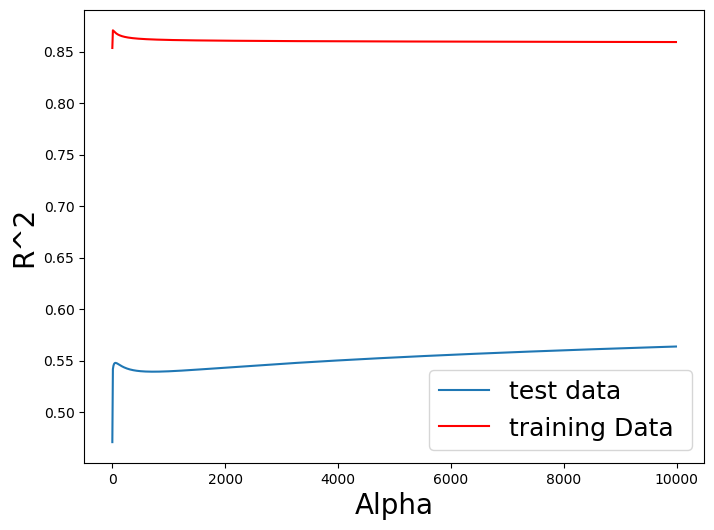

In [54]:
import matplotlib as mpl
mpl.rcParams['figure.dpi'] = 100

width = 8
height = 6
plt.figure(figsize=(width, height))

plt.plot(ALPHA,Rsqu_test, label='test data  ')
plt.plot(ALPHA,Rsqu_train, 'r', label='training Data ')
plt.xlabel('Alpha', fontsize = 20)
plt.ylabel('R^2', fontsize = 20)
plt.legend(prop={'size': 18})

<h2 id="ref4">Part 4: Grid Search</h2>

#### The term Alpha is a hyperparameter, sklearn has the class  <code>GridSearchCV</code> to make the process of finding the best hyperparameter simpler.

In [55]:
from sklearn.model_selection import GridSearchCV

parameters1= [{'alpha': [0.001, 0.01, 0.1,1, 10, 100, 1000, 10000, 100000]}]

# Create a ridge regions object
RR=Ridge()

# Create a grid search object
Grid1 = GridSearchCV(RR, parameters1,cv=4)

# Fit model
Grid1.fit(
    x_data[['horsepower', 'curb-weight', 'engine-size', 'highway-mpg']], 
    y_data
)

GridSearchCV(cv=4, error_score=nan,
             estimator=Ridge(alpha=1.0, copy_X=True, fit_intercept=True,
                             max_iter=None, normalize=False, random_state=None,
                             solver='auto', tol=0.001),
             iid='deprecated', n_jobs=None,
             param_grid=[{'alpha': [0.001, 0.01, 0.1, 1, 10, 100, 1000, 10000,
                                    100000]}],
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring=None, verbose=0)

#### The object finds the best parameter values on the validation data. 

In [56]:
Grid1.best_estimator_

Ridge(alpha=10000, copy_X=True, fit_intercept=True, max_iter=None,
      normalize=False, random_state=None, solver='auto', tol=0.001)

In [57]:
Grid1.best_estimator_.score(
    x_test[['horsepower', 'curb-weight', 'engine-size', 'highway-mpg']], 
    y_test
)

0.8411649831036149

#### Perform a grid search for the alpha parameter and the normalization parameter, then find the best values of the parameters

In [58]:
parameters2= [{'alpha': [0.001,0.01,0.1,1, 10, 100, 1000,10000,100000],
               'normalize':[True,False]} ]

Grid2 = GridSearchCV(
    Ridge(), 
    parameters2,
    cv=4)

Grid2.fit(
    x_data[['horsepower', 'curb-weight', 'engine-size', 'highway-mpg']],
    y_data
)

Grid2.best_estimator_

Ridge(alpha=0.1, copy_X=True, fit_intercept=True, max_iter=None, normalize=True,
      random_state=None, solver='auto', tol=0.001)

In [59]:
Grid2.best_estimator_.score(
    x_test[['horsepower', 'curb-weight', 'engine-size', 'highway-mpg']], 
    y_test
)

0.840859719294301